In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

In [2]:
A3_D4 = '/content/drive/MyDrive/harmonic_beat_tracker/a3d4.ogg'
A3_E4 = '/content/drive/MyDrive/harmonic_beat_tracker/a3e4.ogg'

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


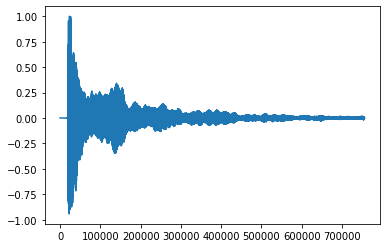

In [4]:
real, sr = librosa.load(A3_E4, sr=None)
plt.plot(real)
Audio(data=real, rate=sr)

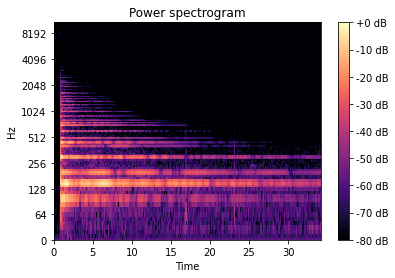

In [6]:
n_fft = 2048

real_cplx_mtx = librosa.stft(real, n_fft=n_fft)
amplitude = np.abs(real_cplx_mtx)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(amplitude, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [7]:
rx = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
ry = np.arange(real_cplx_mtx.shape[1]) * real.shape[0] / sr / real_cplx_mtx.shape[1]

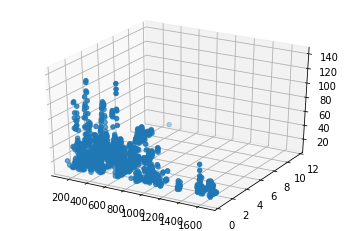

In [8]:
amp_thershold = 10

rxx = []
ryy = []
rzz = []

for i in range(len(rx)):
  if rx[i] > 2000:
    continue
  for j in range(len(ry)):
    amp = real_cplx_mtx[i][j].real
    if amp < amp_thershold:
      continue
    rxx.append(rx[i])
    ryy.append(ry[j])
    rzz.append(amp)
    # dont need to deminish becoz this is real case

ax = plt.axes(projection='3d')
ax.scatter3D(rxx, ryy, rzz)

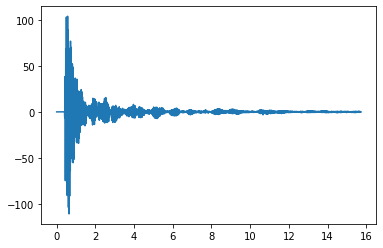

In [9]:
index = np.abs(rx - librosa.note_to_hz('A3')).argmin()
linear_adjusted_amp = real_cplx_mtx[index].real
plt.plot(ry, linear_adjusted_amp)

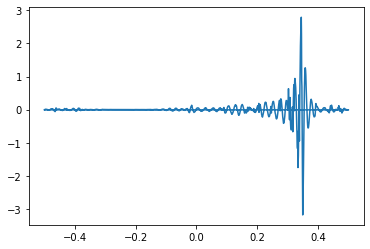

In [10]:
index = np.abs(rx - librosa.note_to_hz('A3')).argmin()
freqs = np.fft.fftfreq(real_cplx_mtx.shape[-1])
plt.plot(freqs, np.fft.fft(real_cplx_mtx[index]).real / real_cplx_mtx.shape[1])